# Regularization to reduce overfitting 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
from sklearn.datasets import make_moons

x, y = make_moons(100, noise=0.25,random_state=2,)

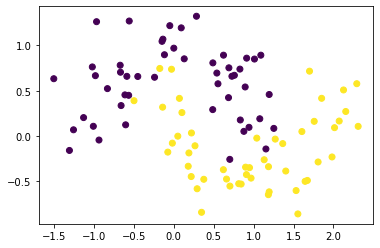

In [11]:
plt.scatter(x[:,0],x[:,1],c=y,)

# ANN

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [23]:
model = Sequential()

model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense (1,activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model.fit(x,y,epochs=2000,validation_split=.20,verbose=0)

3888/3888 [==============================] - 5s 1ms/step


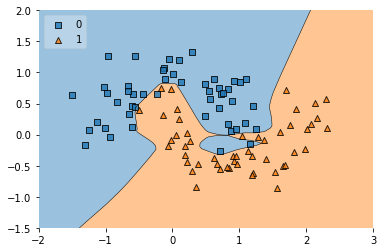

In [25]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y.astype('int'), clf=model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

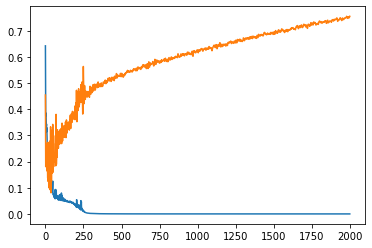

In [26]:
plt.plot(history1.history['loss'],)
plt.plot(history1.history['val_loss'])

plt.show()

# Applying Regularization

In [32]:
model_2 = Sequential()

model_2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model_2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.3)))
model_2.add(Dense(1,activation='sigmoid'))



model_2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

history2 = model_2.fit(x,y,epochs=2000,validation_split=.20,verbose=0)

3888/3888 [==============================] - 7s 2ms/step


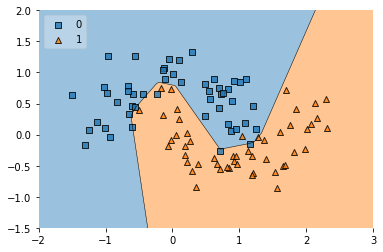

In [33]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y.astype('int'), clf=model_2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

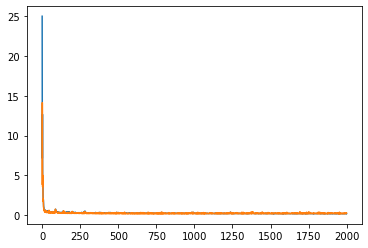

In [34]:
plt.plot(history2.history['loss'],)
plt.plot(history2.history['val_loss'])

plt.show()

In [39]:
model1_weight_layer1 = model.get_weights()[0].reshape(256)
model2_weight_layer1 = model_2.get_weights()[0].reshape(256)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


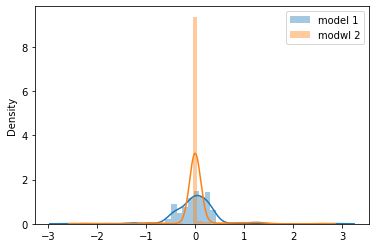

In [42]:
sns.distplot(model1_weight_layer1,label='model 1')
sns.distplot(model2_weight_layer1,label='modwl 2')

plt.legend()
plt.show()